In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets),(test_data,test_targets) = boston_housing.load_data()

In [3]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [5]:
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [6]:
def build_model():
    model = Sequential()
    model.add(Dense(64,activation="relu",input_shape=(train_data.shape[1],)))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop",
                 loss="mse",
                 metrics=["mae"])
    return model

In [8]:
num_epochs = 500
k = 4
val_length = len(train_data) // k
all_histories = []

for i in range(k):
    print("[INFO] Evaluating fold {0}".format(i+1))
    x_val = train_data[i*val_length: (i+1)*val_length]
    y_val = train_targets[i*val_length: (i+1)*val_length]
    
    partial_x_train = np.concatenate((train_data[:i*val_length],
                                       train_data[(i+1)*val_length:]),axis=0)

    partial_y_train = np.concatenate((train_targets[:i*val_length],
                                     train_targets[(i+1)*val_length:]),axis=0)
    
    model = build_model()
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=num_epochs,
                        batch_size=1,
                        validation_data=(x_val,y_val),
                        verbose=0)
    history_dict = history.history
    current_history = history_dict["val_mae"]
    all_histories.append(current_history)

[INFO] Evaluating fold 1
[INFO] Evaluating fold 2
[INFO] Evaluating fold 3
[INFO] Evaluating fold 4


In [9]:
[np.sum(h)/len(h) for h in all_histories]

[2.3015380859375, 2.86289599609375, 2.6973779296875, 2.61497314453125]

In [10]:
avg_mae_history = [np.sum([h[i] for h in all_histories])/len(all_histories) for i in range(num_epochs)]

([<matplotlib.axis.XTick at 0x7f0a4039c438>,
 <a list of 10 Text xticklabel objects>)

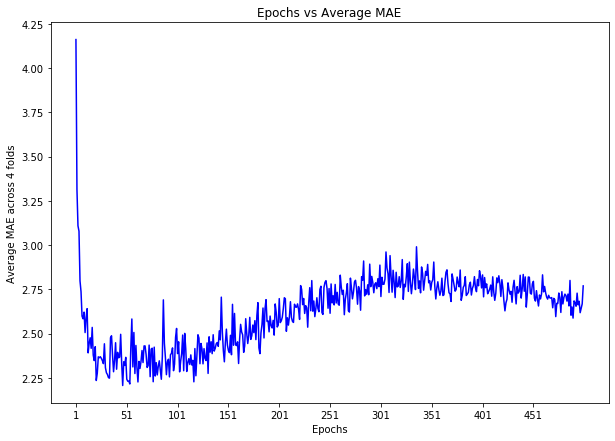

In [11]:
plt.figure(figsize=(10,7))
plt.xlabel("Epochs")
plt.ylabel("Average MAE across 4 folds")
plt.title("Epochs vs Average MAE")
plt.plot(range(1,num_epochs+1),avg_mae_history,"b")
plt.xticks(np.arange(min(range(1,num_epochs+1)),max(range(1,num_epochs+1)),step=50))

In [12]:
def smoothen_points(point_list, factor=0.9):
    smooth_list = []
    for p in point_list:
        if not smooth_list:
            smooth_list.append(p)
        else:
            last = smooth_list[-1]
            smooth_list.append(factor*last + (1-factor)*p)
    return smooth_list

In [13]:
smoothed_avg_mae_history = smoothen_points(avg_mae_history[10:])

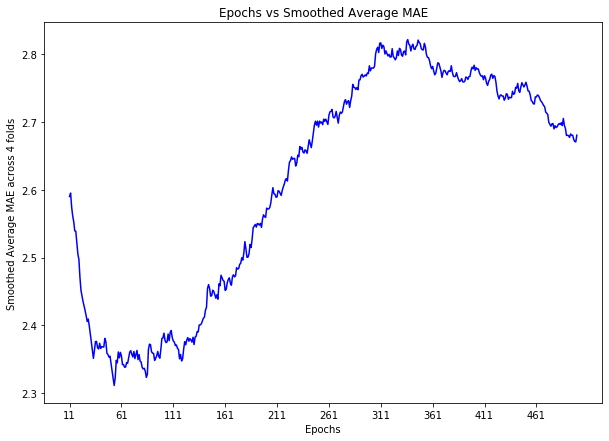

In [14]:
plt.figure(figsize=(10,7))
plt.xlabel("Epochs")
plt.ylabel("Smoothed Average MAE across 4 folds")
plt.title("Epochs vs Smoothed Average MAE")
plt.xticks(np.arange(min(range(1,num_epochs+1)[10:]),max(range(1,num_epochs+1)[10:]),step=50.0))
plt.plot(range(1,num_epochs+1)[10:],smoothed_avg_mae_history,"b")

In [16]:
model = build_model()
history = model.fit(train_data,
                    train_targets,
                    epochs=80,
                    batch_size=16)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 0s 195us/sample - loss: 529.6568 - mae: 20.9186
Epoch 2/80
404/404 [==============================] - 0s 32us/sample - loss: 382.5363 - mae: 17.0615
Epoch 3/80
404/404 [==============================] - 0s 31us/sample - loss: 218.0568 - mae: 12.1186
Epoch 4/80
404/404 [==============================] - 0s 32us/sample - loss: 97.0263 - mae: 7.4542
Epoch 5/80
404/404 [==============================] - 0s 30us/sample - loss: 50.2636 - mae: 5.2065
Epoch 6/80
404/404 [==============================] - 0s 31us/sample - loss: 34.4630 - mae: 4.2474
Epoch 7/80
404/404 [==============================] - 0s 31us/sample - loss: 26.9145 - mae: 3.7217
Epoch 8/80
404/404 [==============================] - 0s 33us/sample - loss: 22.6655 - mae: 3.3949
Epoch 9/80
404/404 [==============================] - 0s 32us/sample - loss: 20.0267 - mae: 3.2093
Epoch 10/80
404/404 [==============================] - 0s 32us/sample - loss: 18.

In [18]:
model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 178us/sample - loss: 18.3986 - mae: 2.6786


[18.398568845262716, 2.678584]